# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

sample_df = transactions.sample(n=5000)
print(sample_df)

            type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
33706    CASH_IN    27178.64   C631009899         348.00        27526.64   
58584   TRANSFER   410933.14   C398614131           0.00            0.00   
809149   CASH_IN   168557.23  C1167954683        2138.00       170695.23   
704514   PAYMENT     6766.60  C2146196210        9703.00         2936.40   
839970  CASH_OUT    62132.64   C481294857           0.00            0.00   
...          ...         ...          ...            ...             ...   
679157  TRANSFER  1075481.74   C402521653           0.00            0.00   
294089   PAYMENT    11497.09  C1141327053      149195.00       137697.91   
375980   CASH_IN   108353.39  C1129974951    16504424.19     16612777.59   
677407   PAYMENT     2191.93  C1229488463           0.00            0.00   
511010   CASH_IN   117679.00   C409218213      892334.49      1010013.49   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
33706   

In [4]:
# TODO: view the shape of your data
sample_df.shape

(5000, 10)

In [5]:
# TODO: Begin your EDA

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 33706 to 511010
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            5000 non-null   object 
 1   amount          5000 non-null   float64
 2   nameOrig        5000 non-null   object 
 3   oldbalanceOrg   5000 non-null   float64
 4   newbalanceOrig  5000 non-null   float64
 5   nameDest        5000 non-null   object 
 6   oldbalanceDest  5000 non-null   float64
 7   newbalanceDest  5000 non-null   float64
 8   isFraud         5000 non-null   int64  
 9   isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 429.7+ KB


In [6]:
sample_df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.0
mean,1.719002e+05,8.479287e+05,8.710725e+05,1.007062e+06,1.123691e+06,0.000400,0.0
std,4.503258e+05,2.886672e+06,2.921736e+06,2.505038e+06,2.713893e+06,0.019998,0.0
min,3.410000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.378569e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.281635e+04,1.475900e+04,0.000000e+00,1.272991e+05,2.165706e+05,0.000000,0.0
75%,2.056008e+05,1.204203e+05,1.590599e+05,9.131725e+05,1.069263e+06,0.000000,0.0
max,1.035759e+07,3.224999e+07,3.238700e+07,4.396706e+07,5.432465e+07,1.000000,0.0


<Axes: xlabel='type', ylabel='amount'>

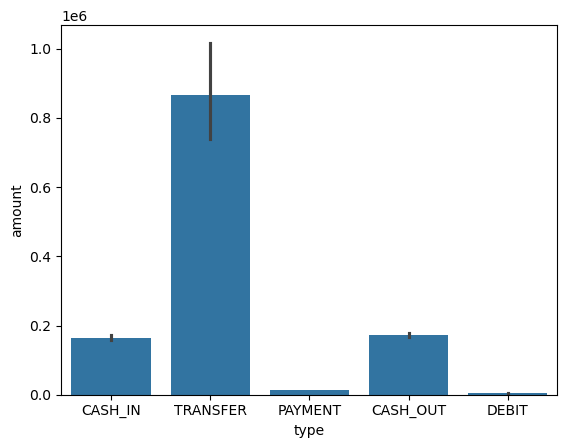

In [7]:
sns.barplot(x=sample_df["type"], y=sample_df["amount"])

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

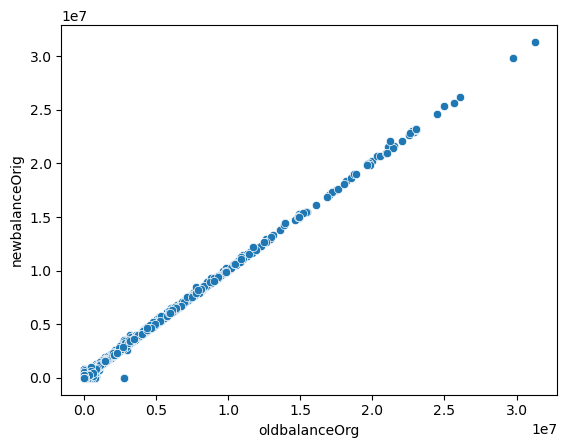

In [50]:
sns.scatterplot(x=sample_df["oldbalanceOrg"], y=sample_df["newbalanceOrig"])

<Axes: xlabel='oldbalanceOrg', ylabel='oldbalanceDest'>

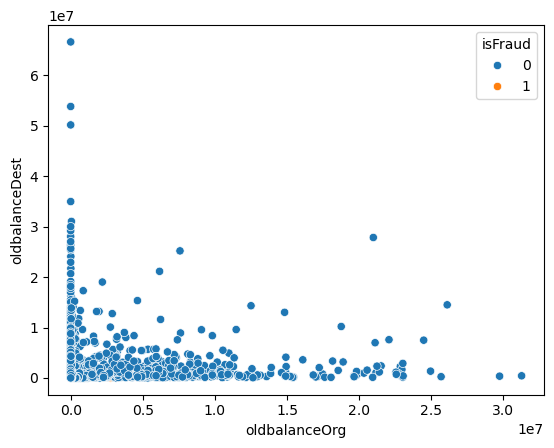

In [51]:
sns.scatterplot(data=sample_df, x="oldbalanceOrg", y="oldbalanceDest", hue="isFraud")

<Axes: xlabel='type', ylabel='amount'>

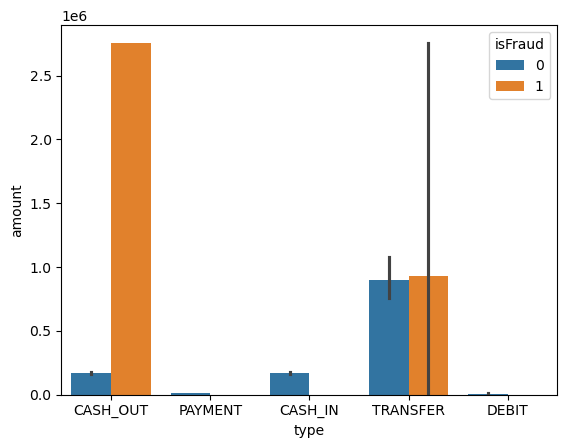

In [52]:
sns.barplot(data=sample_df, x="type", y="amount", hue="isFraud")

In [53]:
transactions[["isFlaggedFraud","amount"]].corr()

,isFlaggedFraud,amount
isFlaggedFraud,1.000000,0.000588
amount,0.000588,1.000000


In [54]:
print("\nSummary of average transaction amounts by fraud label and transaction type:")
print(transactions.groupby(['isFraud', 'type'])['amount'].mean().astype(int))

print("\nSummary of average transaction amounts by flagged fraud label and transaction type:")
print(transactions.groupby(['isFlaggedFraud', 'type'])['amount'].mean().astype(int))


Summary of average transaction amounts by fraud label and transaction type:
isFraud  type    
0        CASH_IN      168928
         CASH_OUT     173427
         DEBIT          5445
         PAYMENT       13055
         TRANSFER     908187
1        CASH_OUT    1326971
         TRANSFER    1384176
Name: amount, dtype: int64

Summary of average transaction amounts by flagged fraud label and transaction type:
isFlaggedFraud  type    
0               CASH_IN     168928
                CASH_OUT    175584
                DEBIT         5445
                PAYMENT      13055
                TRANSFER    911831
1               TRANSFER    536624
Name: amount, dtype: int64


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

According to my first visualization, the bar plot is shown to be imbalanced. It shows that transaction is the most used type and debit is the least used type.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

According to my sns barplot for isFraud, it displays a higher uncertainity rate (error bar) for cash out although being counted highest transaction for fraud. Transfer is the second most common transaction type for fraud and it appears to have no uncertainity rate based on a random sampling of 5000.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

According to the dataset below, it shows that the higher the amount, the more likely the type of transaction is used. For example in the first visual bar plot and the dataset below, it consistently shows that transfer has the highest amount compared to the other types and it displays that on the bar plot.

In [38]:
sample_df = transactions.sample(n=5000)

print(sample_df)

            type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
960793   PAYMENT   24736.75  C1799133939       52169.00        27432.25   
664305   CASH_IN  273729.51   C854936444       13596.00       287325.51   
747998  CASH_OUT   85780.00  C1663940631       51202.00            0.00   
97154    PAYMENT    2195.17  C1260048235      100332.00        98136.83   
63368    CASH_IN  211744.27  C1126887793     2034890.53      2246634.80   
...          ...        ...          ...            ...             ...   
678234   CASH_IN  223502.69  C1891700159       42051.00       265553.69   
619766   PAYMENT   12897.38  C1366643751       14023.97         1126.59   
909127   PAYMENT   26788.03  C1062034785       35654.34         8866.31   
892139  TRANSFER  245340.03  C1100408882       53332.00            0.00   
196972   CASH_IN  202256.61  C1251391752        5806.00       208062.61   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
960793  M1252855231 

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

When comparing fraudlent and non-fraudlent transactions, a difference was shown across the transaction types. Certain transaction types populated more than once like transfer and cash out as well as displayed different numerical amounts. According to the Summary of average transaction amounts by fraud label and transaction type, cash out for both fraudulent an non-fraudulent had different amounts.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

According to the Summary of average transaction amounts by flagged fraud and fraud label and transaction type, there are duplicates which begs to question which of the duplicates are truly fraud or flagged that should have possibly been picked up. This tells me that the systems current performance requires a bit of tuning for improvements because there were a couple of mismatches for the types, cash out and transfer.